In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as it

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../matplotlib-resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "../matplotlib-resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrug_df = pd.read_csv(mouse_drug_data_to_load, encoding="utf-8")
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load, encoding="utf-8")
#mousedrug_df.head(50)
#print(clinicaltrial_df.count())

# Combine the data into a single dataset
drugtrialdata_df = pd.merge(clinicaltrial_df, mousedrug_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
drugtrialdata_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meantumorvolume_df = drugtrialdata_df.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':['mean']})
meantumorvolume_df.columns = ['Mean Tumor Volume']
meantumorvolume_df = meantumorvolume_df.reset_index()

# Preview DataFrame
meantumorvolume_df.head()

,Drug,Timepoint,Mean Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semtumorvolume_df = drugtrialdata_df.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':['sem']})
semtumorvolume_df.columns = ['Mean Tumor Volume']

# reset index in DataFrame
semtumorvolume_df = semtumorvolume_df.reset_index()
meanerror_df = semtumorvolume_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mean Tumor Volume')

# Preview DataFrame

meanerror_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [4]:
# Minor Data Munging to Re-Format the Data Frames
drugtrial_df = meantumorvolume_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mean Tumor Volume')

# Preview that Reformatting worked
drugtrial_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


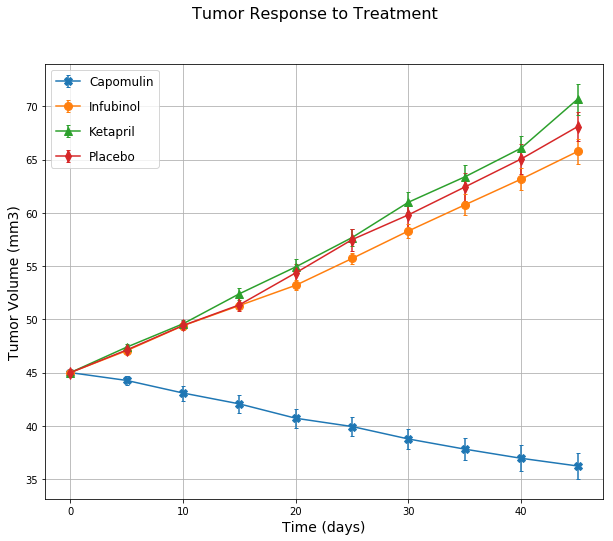

In [5]:
# create subset of data for drug focus
drugfocus_df = drugtrial_df.loc['0':'45',['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
errorfocus_df = meanerror_df.loc['0':'45',['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Generate the Plot (with Error Bars)
# create iterator for markers in plot
markers = it.cycle(("X", "o", "^", "d", "s"))
#change the size of the plot for better display
plt.figure(figsize=(10,8))

# loop through dataframe to build plot
for drug in drugfocus_df.columns:
    plt.errorbar(drugfocus_df.index, drugfocus_df[drug], 
                 yerr=errorfocus_df[drug], marker = next(markers), markersize = 8, capsize = 2)

#Format the plot
plt.suptitle('Tumor Response to Treatment',size = 16)
plt.xlabel('Time (days)',size = 14)
plt.ylabel('Tumor Volume (mm3)',size = 14)
plt.grid()
plt.legend(loc = "upper left", labelspacing = 1, fontsize=12)


plt.savefig('pymaceuticals_BCM_plot1')
plt.show()

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanmetastatic_df = drugtrialdata_df.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':['mean']})
meanmetastatic_df.columns = ['Mean Metastatic']
meanmetastatic_df = meanmetastatic_df.reset_index()

# Convert to DataFrame

# Preview DataFrame
meanmetastatic_df.head()

,Drug,Timepoint,Mean Metastatic
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semmetastatic_df = drugtrialdata_df.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':['sem']})
semmetastatic_df.columns = ['Error Metastatic']
semmetastatic_df = semmetastatic_df.reset_index()

# Convert to DataFrame

# Preview DataFrame
semmetastatic_df.head()

,Drug,Timepoint,Error Metastatic
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
meanmetadata_df = meanmetastatic_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mean Metastatic')
semmetadata_df = semmetastatic_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Error Metastatic')
# Preview that Reformatting worked
meanmetadata_df.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
semmetadata_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


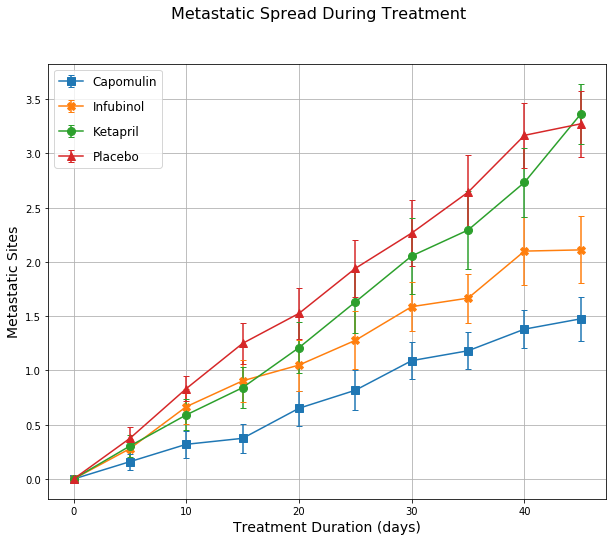

In [11]:
# Generate the Plot (with Error Bars)
# create subset of data for drug focus
drugmetafocus_df = meanmetadata_df.loc['0':'45',['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
semmetafocus_df = semmetadata_df.loc['0':'45',['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Generate the Plot (with Error Bars)

#change the size of the plot for better display
plt.figure(figsize=(10,8))

# loop through dataframe to build plot
for drug in drugmetafocus_df.columns:
    plt.errorbar(drugmetafocus_df.index, drugmetafocus_df[drug], 
                 yerr=semmetafocus_df[drug], marker = next(markers), markersize = 8, capsize = 3)

#Format the plot
plt.suptitle('Metastatic Spread During Treatment',size = 16)
plt.xlabel('Treatment Duration (days)',size = 14)
plt.ylabel('Metastatic Sites',size = 14)
plt.grid()
plt.legend(loc = "upper left", labelspacing = 1, fontsize=12)

# Save the Figure
plt.savefig('pymaceuticals_BCM_plot2')

# Show the Figure
plt.show()

In [12]:
drugtrialdata_df.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo
1905,b879,45,72.555239,2,Stelasyn


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecount_df = drugtrialdata_df.groupby(['Drug','Timepoint']).agg({'Mouse ID':['count']})
mousecount_df.columns = ['Mouse ID']
mousecount_df = mousecount_df.reset_index()
# mousecount_df
# Convert to DataFrame


# Preview DataFrame
mousecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
# 
deadmicedata_df = mousecount_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')
deadmicefocus_df = deadmicedata_df.loc['0':'45',['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Preview the Data Frame
deadmicefocus_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


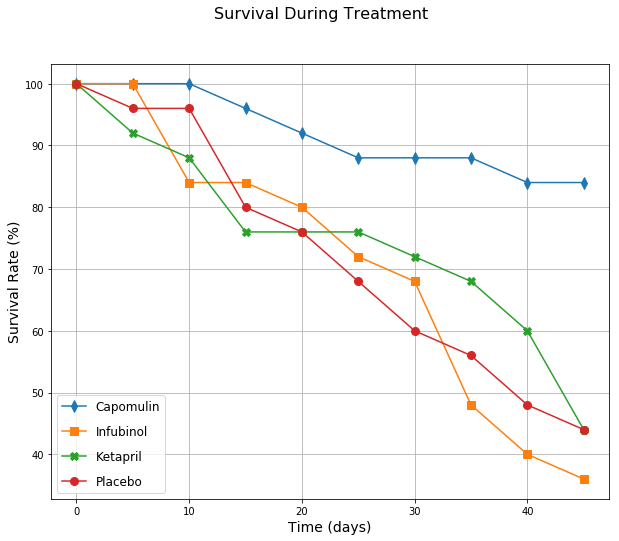

In [15]:
# calculate percentages
deadmicepercent_df = deadmicefocus_df / deadmicefocus_df.iloc[0] *100

# Generate the Plot (Accounting for percentages)

#change the size of the plot for better display
plt.figure(figsize=(10,8))

# loop through dataframe to build plot
for drug in deadmicepercent_df.columns:
    plt.plot(deadmicepercent_df.index, deadmicepercent_df[drug], 
                 marker = next(markers), markersize = 8)

#Format the plot
plt.suptitle('Survival During Treatment',size = 16)
plt.xlabel('Time (days)',size = 14)
plt.ylabel('Survival Rate (%)',size = 14)
plt.grid()
plt.legend(loc = "lower left", labelspacing = 1, fontsize=12)

# Save the Figure
plt.savefig('pymaceuticals_BCM_plot3')

# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
# create dataframe with persent change: end size - start size / start size * 100
drugtrialpercentchange = (drugtrial_df.iloc[9] - drugtrial_df.iloc[0]) / drugtrial_df.iloc[0] *100
drugtrialpercentchange_df = pd.DataFrame(drugtrialpercentchange)
drugtrialpercentchange_df.columns = ['Change']

# Display the data to confirm
drugtrialpercentchange_df


,Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


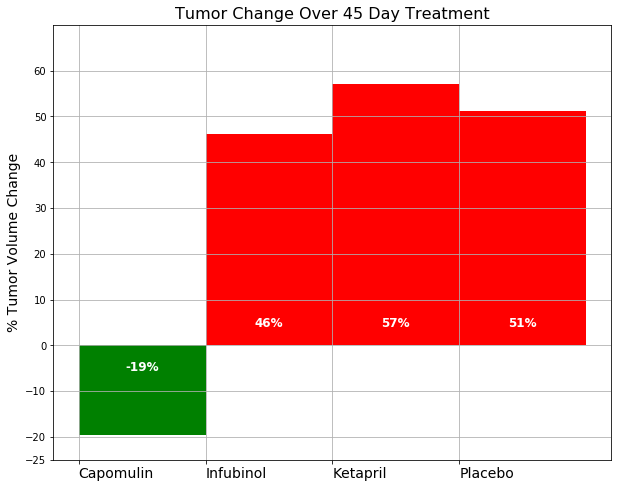

In [17]:
# Store all Relevant Percent Changes into a Tuple
drugfocuspercentchange_df = drugtrialpercentchange_df.drop(
    ['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])

# Splice the data between passing and failing drugs
passdrugs_df = drugfocuspercentchange_df.loc[drugfocuspercentchange_df['Change'] < 0]
faildrugs_df = drugfocuspercentchange_df.loc[drugfocuspercentchange_df['Change'] >= 0]

percentchange_t = tuple(zip(drugfocuspercentchange_df.index, drugfocuspercentchange_df['Change']))

passdrugs_t = tuple(zip(passdrugs_df.index, passdrugs_df['Change']))
faildrugs_t = tuple(zip(faildrugs_df.index, faildrugs_df['Change']))
                
# gather data for bar chart
plt.rcParams["figure.figsize"] = (10,8)
fig, summary = plt.subplots()

# create axes variables
x = [x[0] for x in percentchange_t]
y = [x[1] for x in percentchange_t]

xpass = [x[0] for x in passdrugs_t]
ypass = [x[1] for x in passdrugs_t]
xfail = [x[0] for x in faildrugs_t]
yfail = [x[1] for x in faildrugs_t]

width = 1
ind = np.arange(len(x))

summary.bar(xpass, ypass, color = 'g',width=width, align="edge")
summary.bar(xfail, yfail, color = 'r',width=width, align="edge")

# Orient widths. Add labels, tick marks, etc. 
summary.set_title("Tumor Change Over 45 Day Treatment", fontsize = 16)
summary.set_ylabel("% Tumor Volume Change", fontsize = 14)
summary.grid()
summary.set_yticks([-25, -20, -10, 0, 10, 20, 30, 40, 50, 60])
summary.set_ylim(-25, 70)
summary.tick_params(axis = x, which = 'both', direction = 'inout')
summary.set_xticklabels(x, ha='left', fontsize = 14)

# Use functions to label the percentages of changes
def applylabel(summary, spacing=0):
    
# y height will determine label position
    (y_bottom, y_top) = summary.get_ylim()
    y_height = y_top - y_bottom

    for rect in summary.patches:
        height = rect.get_height()

# create rectagle based on height
        p_height = (height / y_height)

# place label above x axis if height is positive
# place label below x axis if height is negative
        if height > 0:
            label_position = y_height * 0.05
        else:
            label_position = -y_height * 0.05

        summary.text(rect.get_x() + rect.get_width() / 2.,
                     label_position, '%d' % int(height) + "%",
                     ha = 'center', va = 'center', color = 'white', fontsize = 12, fontweight='bold')
        
# Call functions to implement the function calls

applylabel(summary)

# Save the Figure
plt.savefig('pymaceuticals_BCM_plot4')

# Show the Figure
fig.show()

Analysis Narrative:
Of the drugs included in the analysis, Capomulin was the only drug that gave indications of being effective reducing the size of the tumors. Capomulin indicated a higher survival rate of the mice over the term of the trial. Results also showed that Capomulin had the lowest rate of metastasis as indicated by the number of metstatic sites. 

It should be noted that Ramicane had similar results to Capomulin but was not indluded in the analysis. 